# <i><b>Trabajo Practico Numero 1º<b><i> 

#### <b><i>Integrantes:<i><b>
#### <b><i>-Agustin Galli.<i><b>
#### <b><i>-Ana Affranchino.<i><b>
#### <b><i>-Fernando Castro Saia.<i><b>
#### <b><i>-Martin Sciandro.<i><b>
#### <b><i>-Tobias Canavesi.<i><b>

------------------------------------------------------------------------------------------------------

##### <i>Importacion de librerias y del DataFrame:<i>

In [1]:
#Importacion de librerias para Dataframes & Arrays:
import pandas as pd
import geopandas as gpd
import numpy as np
#Importacion de librerias de visualizacion:
import seaborn as sns
import contextily as cx
import matplotlib as mlp
import matplotlib.pyplot as plt
import re

In [2]:
data = pd.read_csv("properatti.csv", sep = ",", encoding = 'latin1')
data.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en dÃ©cimo piso al frent...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa AtlÃ¡ntica|Mar d...,Argentina,Buenos Aires Costa AtlÃ¡ntica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÃSTICA ILUMINACIÃN NATU...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


### <i> Limpieza de Datos: <i>

In [3]:
#Eliminacion columnas innecesarias:
data_1=data.drop(columns=['image_thumbnail','properati_url','lat-lon','Unnamed: 0','expenses','price_aprox_local_currency'])

In [4]:
#Cantidad de nulos:
(data_1.isnull().sum()/data_1.shape[0])*100

operation                   0.000000
property_type               0.000000
place_name                  0.018974
place_with_parent_names     0.000000
country_name                0.000000
state_name                  0.000000
geonames_id                15.440521
lat                        42.525986
lon                        42.525986
price                      16.837156
currency                   16.837981
price_aprox_usd            16.837156
surface_total_in_m2        32.443491
surface_covered_in_m2      16.422208
price_usd_per_m2           43.394654
price_per_m2               27.686850
floor                      93.483749
rooms                      60.905791
description                 0.001650
title                       0.000000
dtype: float64

In [5]:
data_1.head(3)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,USD,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,USD,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en dÃ©cimo piso al frent...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,72000.0,USD,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO


<AxesSubplot:>

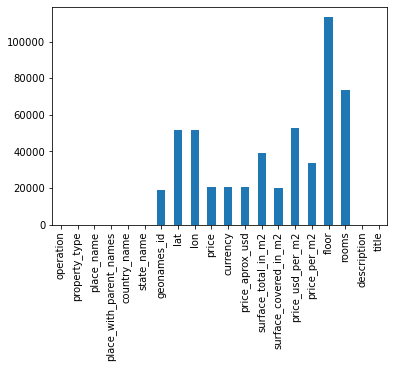

In [6]:
#Numero de nulos por columna:
vc_nulls = data_1.apply(lambda x: x.isnull().value_counts()).T[True]
vc_nulls.hist() 
vc_nulls.plot(kind = 'bar')

In [7]:
#Filtramos y limpiamos moneda dejando unicamente USD y ARS:
monedas=data_1['currency'].unique()
monedas

array(['USD', nan, 'ARS', 'PEN', 'UYU'], dtype=object)

In [8]:
data_1['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [9]:
mask1=data['currency']=='UYU'
data_1[mask1]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title
107390,sell,house,San Roque,|Argentina|Mendoza|San Roque|,Argentina,Mendoza,3836586.0,NaN,NaN,650000000.0,UYU,22980378.29,NaN,NaN,NaN,NaN,NaN,NaN,"Casa con CalefacciÃ³n central, Mendoza, San Ro...",Casa - San Vicente


In [10]:
mask2=data['currency']=='PEN'
data_1[mask2]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title
50387,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,380000.0,PEN,117139.33,NaN,NaN,NaN,NaN,NaN,NaN,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: DÃºplex ...,DUPLEX A LA VENTA | Liniers 1200 | Tandil
50388,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,950000.0,PEN,292848.33,NaN,NaN,NaN,NaN,NaN,NaN,Ref.: 56Duplex en venta de 1 dormitorio con ap...,DUPLEX A LA VENTA | Liniers 1200 | Tandil


In [11]:
data_2=data_1.drop(index=[107390,50387,50388])
data_2['currency'].unique()

array(['USD', nan, 'ARS'], dtype=object)

In [12]:
data_2.head(2)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,USD,62000.0,55.0,40.0,1127.272727,1550.0,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,USD,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en dÃ©cimo piso al frent...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...


In [13]:
maskarg=data_2['currency']=='ARS'
data_2[maskarg]['price_aprox_usd'].isnull().sum()

0

In [14]:
#Eliminacion de duplicados con igual latitud, longitud y descripcion:
data_2_nodup = data_2.drop_duplicates(subset = ['description',"lat", "lon"], keep = "first")
data_2_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106385 entries, 0 to 121219
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   operation                106385 non-null  object 
 1   property_type            106385 non-null  object 
 2   place_name               106362 non-null  object 
 3   place_with_parent_names  106385 non-null  object 
 4   country_name             106385 non-null  object 
 5   state_name               106385 non-null  object 
 6   geonames_id              89413 non-null   float64
 7   lat                      64074 non-null   float64
 8   lon                      64074 non-null   float64
 9   price                    90165 non-null   float64
 10  currency                 90164 non-null   object 
 11  price_aprox_usd          90165 non-null   float64
 12  surface_total_in_m2      69739 non-null   float64
 13  surface_covered_in_m2    88644 non-null   float64
 14  pric

In [15]:
data_2_nodup.head(5)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,USD,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,USD,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en dÃ©cimo piso al frent...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,72000.0,USD,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,-34.647797,-58.516424,95000.0,USD,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa AtlÃ¡ntica|Mar d...,Argentina,Buenos Aires Costa AtlÃ¡ntica,3435548.0,-38.002626,-57.549447,64000.0,USD,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,DEPARTAMENTO CON FANTÃSTICA ILUMINACIÃN NATU...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...


In [16]:
#Analisis de outliers sobre la columna de precios 'price_aprox_usd':
describe_price_aprox_usd = data_2_nodup["price_aprox_usd"].describe()
describe_price_aprox_usd

count    9.016500e+04
mean     2.453305e+05
std      3.946432e+05
min      0.000000e+00
25%      9.000000e+04
50%      1.500000e+05
75%      2.750000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

In [17]:
q1 = describe_price_aprox_usd.quantile(0.25)
print(q1)
q2 = describe_price_aprox_usd.quantile(0.5)
print(q2)
q3 = describe_price_aprox_usd.quantile(0.75)
print(q3)


iqr = (q3 - q1) * 1.5

up_threshold = q3 + iqr
low_threshold = q1 - iqr

print(up_threshold)
print(low_threshold)

outlier_mask_up = describe_price_aprox_usd > up_threshold
outlier_mask_down = describe_price_aprox_usd < low_threshold
outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
not_outliers = np.logical_not(outlier_mask)

outliers = describe_price_aprox_usd[outlier_mask]

90123.75
197665.27362274716
304910.7888335794
627091.3470839486
-232056.8082503691


In [18]:
describe_price_aprox_usd_filtered = describe_price_aprox_usd[not_outliers]
describe_price_aprox_usd_filtered.describe()

count         7.000000
mean     177876.957511
std      134662.256896
min           0.000000
25%       90082.500000
50%      150000.000000
75%      260165.273623
max      394643.155334
Name: price_aprox_usd, dtype: float64

In [19]:
describe_price_aprox_usd.describe()

count    8.000000e+00
mean     5.973823e+06
std      1.639388e+07
min      0.000000e+00
25%      9.012375e+04
50%      1.976653e+05
75%      3.049108e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

In [20]:
#Imputacion precio 'price_usd_per_m2':
data_2_nodup['price_usd_per_m2_clean'] = data_2_nodup['price_usd_per_m2']
mask1 = data_2_nodup['price_usd_per_m2_clean'].isnull()

(data_2_nodup.loc[mask1, 'price_usd_per_m2_clean']).isnull().sum()
data_2_nodup.loc[mask1, 'price_usd_per_m2_clean'] = (data_2_nodup.loc[mask1, 'price']/data_2_nodup.loc[mask1, 'surface_covered_in_m2'])
data_2_nodup.loc[:, 'price_usd_per_m2_clean'].isnull().sum()/data_2_nodup.shape[0]

C:\Users\agalli\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\agalli\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


0.2225407717253372

In [21]:
#Analisis de outliers sobre la columna 'price_usd_per_m2_clean'
describe_price_usd_per_m2_clean = data_2_nodup["price_usd_per_m2_clean"].describe()
describe_price_usd_per_m2_clean

count    8.271000e+04
mean     3.558534e+03
std      2.620394e+04
min      6.000000e-01
25%      1.222222e+03
50%      1.800000e+03
75%      2.521186e+03
max      4.000000e+06
Name: price_usd_per_m2_clean, dtype: float64

In [22]:
q1 = describe_price_usd_per_m2_clean.quantile(0.25)
print(q1)
q2 = describe_price_usd_per_m2_clean.quantile(0.5)
print(q2)
q3 = describe_price_usd_per_m2_clean.quantile(0.75)
print(q3)


iqr = (q3 - q1) * 1.5

up_threshold = q3 + iqr
low_threshold = q1 - iqr

print(up_threshold)
print(low_threshold)

outlier_mask_up = describe_price_usd_per_m2_clean > up_threshold
outlier_mask_down = describe_price_usd_per_m2_clean < low_threshold
outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
not_outliers = np.logical_not(outlier_mask)

outliers = describe_price_usd_per_m2_clean[outlier_mask]

1655.5555555555557
3039.860037121759
40330.45601529971
98342.80670491594
-56356.795134060674


In [23]:
describe_price_usd_per_m2_clean_filtered = describe_price_usd_per_m2_clean[not_outliers]
describe_price_usd_per_m2_clean_filtered.describe()

count        7.000000
mean     16859.497664
std      30445.704082
min          0.600000
25%       1511.111111
50%       2521.186441
75%      14881.237494
max      82710.000000
Name: price_usd_per_m2_clean, dtype: float64

In [24]:
describe_price_usd_per_m2_clean.describe()

count    8.000000e+00
mean     5.147521e+05
std      1.408535e+06
min      6.000000e-01
25%      1.655556e+03
50%      3.039860e+03
75%      4.033046e+04
max      4.000000e+06
Name: price_usd_per_m2_clean, dtype: float64

In [25]:
describe_price_usd_per_m2_clean_filtered

count    82710.000000
mean      3558.533634
std      26203.941354
min          0.600000
25%       1222.222222
50%       1800.000000
75%       2521.186441
Name: price_usd_per_m2_clean, dtype: float64

### <i> Limpieza con REGEX: <i>

In [26]:
data_2_nodup['description'][1]

'Venta de departamento en dÃ©cimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcÃ³n con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. CalefacciÃ³n por radiadorBaÃ±o completo.BalcÃ³n corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publicado por Pixel Inmobiliario (Servicio de PÃ¡ginas Web para Inmobiliarias).'

In [27]:
#REGEX piletas:
pileta_pattern = "pileta|picina|pisina|piscina"
pileta_regex = re.compile(pileta_pattern, re.I)
pileta_matches = data_2_nodup['description'].apply(lambda x: x if x is np.NaN else pileta_regex.search(x))
pileta_mask = pileta_matches.notnull()
pileta_description = pileta_matches.loc[pileta_mask]

In [28]:
pileta_description

7         <re.Match object; span=(102, 108), match='PILE...
8         <re.Match object; span=(102, 108), match='PILE...
13        <re.Match object; span=(101, 108), match='Pisc...
14        <re.Match object; span=(76, 83), match='Piscina'>
18        <re.Match object; span=(421, 428), match='Pisc...
                                ...                        
121155    <re.Match object; span=(263, 269), match='pile...
121211    <re.Match object; span=(458, 464), match='pile...
121212    <re.Match object; span=(601, 607), match='pile...
121213    <re.Match object; span=(269, 275), match='pile...
121215    <re.Match object; span=(292, 298), match='pile...
Name: description, Length: 28336, dtype: object

In [29]:
pileta_description.iloc[2].string

' Torre I Mondrian. 3 ambientes con terraza y dos baÃ±os al frente.Vitraux ofrece en el ultimo nivel, Piscina con Solarium, un espacio con Sala de ReuniÃ³n para uso profesional, eventos o proyecciones con un amplio Foyer, Sauna, Gimnasio, un SalÃ³n de Usos MÃºltiples con cocina y una amplia expansiÃ³n. Asimismo cuenta con un Hall en Doble altura y un amplio Estar que balconea al mismo en el primer piso.AsÃ\xad destaca la Excelente RelaciÃ³n de espacios de uso comÃºn sobre el metro propio, sobre todo en Studios que rondan los 30 metros propios y pueden gozar de todos los diferentes usos especiales.'

In [30]:
pileta_mask

0         False
1         False
2         False
3         False
4         False
          ...  
121214    False
121215     True
121217    False
121218    False
121219    False
Name: description, Length: 106385, dtype: bool

In [31]:
description_to_replace = [x.string for x in pileta_description]
print(len(description_to_replace))
description_to_replace_unique = list(set(description_to_replace))
print(len(description_to_replace_unique))

28336
27893


In [32]:
#Creacion de nuevas columnas:
data_2_nodup['pileta']=''
data_2_nodup['cochera']=''
data_2_nodup.loc[pileta_mask, 'pileta'] =1

C:\Users\agalli\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\agalli\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\agalli\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is tryi

In [33]:
data_2_nodup.head(1)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title,price_usd_per_m2_clean,pileta,cochera
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,...,40.0,1127.272727,1550.0,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1127.272727,,


In [34]:
#REGEX cochera:
cochera_pattern = "cochera|garage"
cochera_regex = re.compile(cochera_pattern, re.I)
cochera_matches = data_2_nodup['description'].apply(lambda x: x if x is np.NaN else cochera_regex.search(x))
cochera_mask = cochera_matches.notnull()
cochera_description = cochera_matches.loc[cochera_mask]

In [35]:
cochera_description.iloc[0].string

'Venta de departamento en dÃ©cimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcÃ³n con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. CalefacciÃ³n por radiadorBaÃ±o completo.BalcÃ³n corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publicado por Pixel Inmobiliario (Servicio de PÃ¡ginas Web para Inmobiliarias).'

In [36]:
description_to_replace_cochera= [x.string for x in cochera_description]
print(len(description_to_replace_cochera))
description_to_replace_unique_cochera = list(set(description_to_replace_cochera))
print(len(description_to_replace_unique_cochera))

43859
43286


In [37]:
data_2_nodup.loc[cochera_mask, 'cochera'] = 1

C:\Users\agalli\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [38]:
data_2_nodup.head(3)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title,price_usd_per_m2_clean,pileta,cochera
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,...,40.0,1127.272727,1550.000000,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1127.272727,,
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,...,NaN,NaN,NaN,NaN,NaN,Venta de departamento en dÃ©cimo piso al frent...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,NaN,,1
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,72000.0,...,55.0,1309.090909,1309.090909,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1309.090909,,


In [39]:
#REGEX ambientes:
pattern_ambientes = "(?P<ambiente>\w+?\s(amb|AMB|Ambiente|ambiente|AMBIENTE|Ambientes|ambientes|AMBIENTES|MONOAMBIENTE)\s\d?)"
regex_ambientes = re.compile(pattern_ambientes)
description = data_2_nodup['description'].astype(str)
resultado_ambientes = description.apply(lambda x: regex_ambientes.search(x))
ambientes_match = resultado_ambientes.apply(lambda x: x if x is None else x.group('ambiente'))
ambientes_match.value_counts

<bound method IndexOpsMixin.value_counts of 0                   2 AMBIENTES 
1                           None
2                  2 AMBIENTES 3
3                   3 ambientes 
4                           None
                   ...          
121214                      None
121215                      None
121217    DEPARTAMENTO AMBIENTE 
121218                      None
121219                      None
Name: description, Length: 106385, dtype: object>

In [40]:
pattern_ambientes = "(?P<ambiente>\w+?\s(amb|AMB|Ambiente|ambiente|AMBIENTE|Ambientes|ambientes|AMBIENTES|MONOAMBIENTE)\s\d?)"
regex_ambientes = re.compile(pattern_ambientes)
title = data_2_nodup['title'].astype(str)
resultado_ambientes2 = title.apply(lambda x: regex_ambientes.search(x))
ambientes_match2 = resultado_ambientes2.apply(lambda x: x if x is None else x.group('ambiente'))
ambientes_match2.value_counts

<bound method IndexOpsMixin.value_counts of 0                         2 AMB 
1                           None
2                        2 AMB 3
3                           None
4                         2 AMB 
                   ...          
121214                      None
121215                      None
121217    DEPARTAMENTO AMBIENTE 
121218                      None
121219                      None
Name: title, Length: 106385, dtype: object>

In [41]:
ambientes_match.head(10)

0               2 AMBIENTES 
1                       None
2              2 AMBIENTES 3
3               3 ambientes 
4                       None
5                       None
6                       None
7    EXCELENTE MONOAMBIENTE 
8             DOS AMBIENTES 
9                       None
Name: description, dtype: object

In [42]:
data_2_nodup['ambientes'] = ambientes_match
data_2_nodup['ambientes2'] = ambientes_match2

C:\Users\agalli\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\agalli\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
data_ambientes = data_2_nodup.loc[:, 'ambientes': 'ambientes2'].astype(str)
data_ambientes

,ambientes,ambientes2
0,2 AMBIENTES,2 AMB
1,None,None
2,2 AMBIENTES 3,2 AMB 3
3,3 ambientes,None
4,None,2 AMB
...,...,...
121214,None,None
121215,None,None
121217,DEPARTAMENTO AMBIENTE,DEPARTAMENTO AMBIENTE
121218,None,None


In [44]:
pattern_nro_ambientes = "(?P<nro_ambientes>\d)"
regex_nro_ambientes = re.compile(pattern_nro_ambientes)

resultado_nro_amb = data_ambientes['ambientes'].apply(lambda x: regex_nro_ambientes.search(x))
# [('ambientes', 'ambientes2')]
nro_amb_match = resultado_nro_amb.apply(lambda x: x if x is None else x.group('nro_ambientes'))

In [45]:
pattern_nro_ambientes = "(?P<nro_ambientes>\d)"
regex_nro_ambientes = re.compile(pattern_nro_ambientes)

resultado_nro_amb2 = data_ambientes['ambientes2'].apply(lambda x: regex_nro_ambientes.search(x))

nro_amb_match2 = resultado_nro_amb2.apply(lambda x: x if x is None else x.group('nro_ambientes'))

nro_amb_match2

0            2
1         None
2            2
3         None
4            2
          ... 
121214    None
121215    None
121217    None
121218    None
121219    None
Name: ambientes2, Length: 106385, dtype: object

In [46]:
df_amb = pd.DataFrame([nro_amb_match, nro_amb_match2])
df_ambientes = df_amb.T
df_ambientes

,ambientes,ambientes2
0,2,2
1,None,None
2,2,2
3,3,None
4,None,2
...,...,...
121214,None,None
121215,None,None
121217,None,None
121218,None,None


In [47]:
ambientes=df_ambientes.apply(lambda x: x['ambientes'] if x['ambientes']!= None else x['ambientes2'],axis=1)

In [48]:
data_3_nodup = data_2_nodup.drop(['ambientes', 'ambientes2'], axis=1)
data_3_nodup['ambientes'] = ambientes
data_3_nodup.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,description,title,price_usd_per_m2_clean,pileta,cochera,ambientes
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,...,1127.272727,1550.000000,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1127.272727,,,2
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,...,NaN,NaN,NaN,NaN,Venta de departamento en dÃ©cimo piso al frent...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,NaN,,1,None
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,72000.0,...,1309.090909,1309.090909,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1309.090909,,,2
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,-34.647797,-58.516424,95000.0,...,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,NaN,,,3
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa AtlÃ¡ntica|Mar d...,Argentina,Buenos Aires Costa AtlÃ¡ntica,3435548.0,-38.002626,-57.549447,64000.0,...,1828.571429,1828.571429,NaN,NaN,DEPARTAMENTO CON FANTÃSTICA ILUMINACIÃN NATU...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,1828.571429,,,2


In [49]:
#REGEX barrio:
pattern_barrio = "(?P<barrio_cerrado>\w+?\s(barrio cerrado)\s\d?)"
regex_barrio = re.compile(pattern_barrio, flags=re.IGNORECASE)
description = data_3_nodup['description'].astype(str)
resultado_barrio = description.apply(lambda x: regex_barrio.search(x))
resultado_barrio.value_counts()

barrios_match = resultado_barrio.apply(lambda x: x if x is None else x.group('barrio_cerrado'))

barrios_match.value_counts()

data_3_nodup['barrio_cerrado']= barrios_match

In [50]:
operation_type = data_2_nodup.groupby('property_type', axis=0).count().iloc[:, 0]
operation_type

property_type
PH            5359
apartment    57827
house        39248
store         3951
Name: operation, dtype: int64

In [51]:
data_2_nodup.loc[data_2_nodup['place_name'].isnull(), 'place_name'] = 'Tigre'

C:\Users\agalli\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [52]:
data_3_nodup.groupby(['place_name', 'property_type'])['price_usd_per_m2'].mean().round(2)

place_name               property_type
 Country Maschwitz Club  house            1369.99
 los alamos              apartment        1600.00
9 de Abril               house              94.02
                         store             181.82
Abasto                   PH               1548.24
                                           ...   
Yerba Buena              store             694.02
Zelaya                   house             307.06
ZÃ¡rate                  house              21.04
coordenadas 34.255511    house            1943.46
Ãlvarez                 house                NaN
Name: price_usd_per_m2, Length: 2117, dtype: float64

In [53]:
mask_place1= data_3_nodup['place_name'].value_counts() ==1
mask_place1.value_counts()

mask1= data_3_nodup['place_name']  == ' Country Maschwitz Club'

data_3_nodup[mask1]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,...,price_per_m2,floor,rooms,description,title,price_usd_per_m2_clean,pileta,cochera,ambientes,barrio_cerrado
33586,sell,house,Country Maschwitz Club,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| C...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,-34.377389,-58.756006,320000.0,...,1230.769231,NaN,NaN,"Casa en Club Maschwitz, ubicada en lote centra...",Hermosa Casa en venta en Maschwitz Country Club,1066.666667,1,,None,None
42404,sell,house,Country Maschwitz Club,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| C...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,-34.378286,-58.754186,420000.0,...,1866.666667,NaN,NaN,Casa tradicional en 2 plantas al lago!! Excele...,excelente casa al lago desarrollada en 2 plantas,1673.306773,,,None,None
45159,sell,house,Country Maschwitz Club,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar| C...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,-34.377446,-58.756042,195000.0,...,812.500000,9.0,4.0,Corredor Responsable: Luis Alberto De Blas - C...,CASA EN DOS PLANTAS MASCHWITZ CLUB,812.500000,,,None,None


In [54]:
data_3_nodup.place_with_parent_names.str.split(expand= True )

,0,1,2,3,4,5,6,7,8,9,10,11
0,|Argentina|Capital,Federal|Mataderos|,None,None,None,None,None,None,None,None,None,None
1,|Argentina|Bs.As.,G.B.A.,Zona,Sur|La,Plata|,None,None,None,None,None,None,None
2,|Argentina|Capital,Federal|Mataderos|,None,None,None,None,None,None,None,None,None,None
3,|Argentina|Capital,Federal|Liniers|,None,None,None,None,None,None,None,None,None,None
4,|Argentina|Buenos,Aires,Costa,AtlÃ¡ntica|Mar,del,Plata|Centro|,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
121214,|Argentina|Bs.As.,G.B.A.,Zona,Norte|San,Isidro|,None,None,None,None,None,None,None
121215,|Argentina|Capital,Federal|Belgrano|,None,None,None,None,None,None,None,None,None,None
121217,|Argentina|Capital,Federal|Villa,Urquiza|,None,None,None,None,None,None,None,None,None
121218,|Argentina|Buenos,Aires,Costa,AtlÃ¡ntica|Mar,del,Plata|Plaza,ColÃ³n|,None,None,None,None,None


In [55]:
df_data = pd.DataFrame(data_3_nodup.place_with_parent_names.str.split('|',4).tolist(),
                         columns = ['first','2','3','place_final', 'Last'])

labels_drop = ['2', '3', 'Last']
df_data1 = df_data.drop(labels= labels_drop, axis=1)

In [56]:
result = pd.concat([data_3_nodup, df_data1], axis=1)
result

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,...,rooms,description,title,price_usd_per_m2_clean,pileta,cochera,ambientes,barrio_cerrado,first,place_final
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,...,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1127.272727,,,2,None,,Mataderos
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,...,NaN,Venta de departamento en dÃ©cimo piso al frent...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,NaN,,1,None,None,,La Plata
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,72000.0,...,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1309.090909,,,2,None,,Mataderos
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,-34.647797,-58.516424,95000.0,...,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,NaN,,,3,None,,Liniers
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa AtlÃ¡ntica|Mar d...,Argentina,Buenos Aires Costa AtlÃ¡ntica,3435548.0,-38.002626,-57.549447,64000.0,...,NaN,DEPARTAMENTO CON FANTÃSTICA ILUMINACIÃN NATU...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,1828.571429,,,2,None,,Mar del Plata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121214,sell,store,San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro|,Argentina,Bs.As. G.B.A. Zona Norte,3428983.0,NaN,NaN,NaN,...,NaN,***VENTA CON RENTA***Local en EDIFICIO lomas ...,Local - San Isidro,NaN,,1,None,None,NaN,NaN
121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,870000.0,...,NaN,TORRE FORUM ALCORTA - MÃXIMA CATEGORÃA.Impec...,Torre Forum Alcorta- Impecable 3 ambientes,7699.115044,1,1,None,None,NaN,NaN
121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,-34.570639,-58.475596,131500.0,...,NaN,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,2858.695652,,1,None,None,NaN,NaN
121218,sell,apartment,Plaza ColÃ³n,|Argentina|Buenos Aires Costa AtlÃ¡ntica|Mar d...,Argentina,Buenos Aires Costa AtlÃ¡ntica,NaN,NaN,NaN,95900.0,...,NaN,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,1997.916667,,,None,None,NaN,NaN


In [57]:
result['place_final'].value_counts()

Tigre            7879
Mar del Plata    7317
Rosario          5978
CÃ³rdoba         5672
                 3779
                 ... 
PerÃº               1
Vistalba            1
Pedro Molina        1
PÃ©rez              1
El Dorado           1
Name: place_final, Length: 538, dtype: int64

In [58]:
#Armado de pivot:
data_pivot = result.pivot_table(index = ['place_final', 'property_type' ], aggfunc={'price_usd_per_m2':'mean'}).round(2)
data_pivot

price_usd_per_m2
place_final property_type                  
            PH                      1352.29
            apartment               2546.06
            house                   1196.01
            store                   1782.41
Abasto      PH                      1785.74
...                                     ...
Yerba Buena store                    425.71
ZÃ¡rate     PH                       864.66
            apartment               2333.48
            house                   1079.17
Ãlvarez    house                    666.67

[1092 rows x 1 columns]

In [59]:
abastoprices=data_pivot.loc['Abasto']
abastoprices

,price_usd_per_m2
property_type,
PH,1785.74
apartment,3156.60
house,1080.60
store,1136.36


### <i> Geo analisis: <i>

In [60]:
#Eliminamos outliers o errores de locación
data_3_nodup=data_3_nodup.drop(index=[28512])
data_3_nodup=data_3_nodup.drop(index=[9761])

In [61]:
geo_prop = gpd.points_from_xy(data_3_nodup.lon, data_3_nodup.lat)
dptos = gpd.GeoDataFrame(data_3_nodup, geometry=geo_prop)

In [62]:
dptos.head(2)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,...,floor,rooms,description,title,price_usd_per_m2_clean,pileta,cochera,ambientes,barrio_cerrado,geometry
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,...,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1127.272727,,,2,None,POINT (-58.50884 -34.66182)
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,...,NaN,NaN,Venta de departamento en dÃ©cimo piso al frent...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,NaN,,1,None,None,POINT (-57.96433 -34.90388)


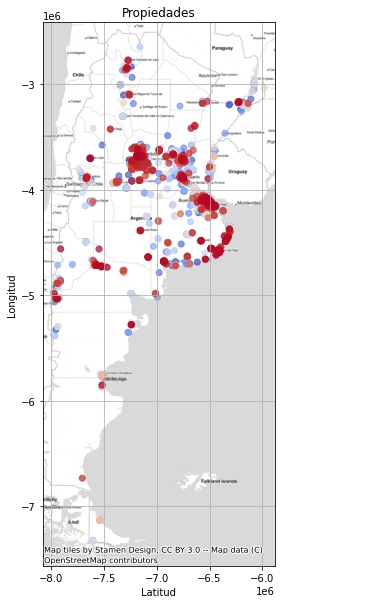

In [63]:
fig, ax = plt.subplots(figsize=(6,10))
ax.set_title('Propiedades')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')
plt.grid()

dptos.crs = "EPSG:4326"                        
geo_mask_3857 = dptos.to_crs(epsg=3857)       
geo_mask_3857.plot(cmap='coolwarm', ax=ax,legend = True,alpha=0.7)

cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

In [64]:
tipo_prop=data_3_nodup['property_type'].value_counts()
tipo_prop

apartment    57826
house        39247
PH            5359
store         3951
Name: property_type, dtype: int64

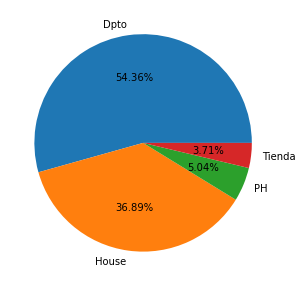

In [65]:
titulos=['Dpto','House','PH','Tienda']

fig = plt.figure(figsize=(10,5)); ax = plt.axes()

ax.pie(tipo_prop, labels = titulos ,autopct='%1.2f%%')
plt.show()

In [66]:
#Definicion de m2 por c/propiedad:
maskcasa=data_3_nodup['property_type']=='house'
meancasa=data_3_nodup['price_usd_per_m2_clean'][maskcasa]
pricecasa=meancasa.mean().round(2)
print(pricecasa)

2760.31


In [67]:
maskdpto=data_3_nodup['property_type']=='apartment'
meandpto=data_3_nodup['price_usd_per_m2_clean'][maskdpto]
pricedpto=meandpto.mean().round(2)
print(pricedpto)

3874.8


In [68]:
maskph=data_3_nodup['property_type']=='PH'
#maskph2=data_3_nodup['price_usd_per_m2_clean']>0
meanph=data_3_nodup['price_usd_per_m2_clean'][maskph]
priceph=meanph.mean().round(2)
print(priceph)

2689.83


In [69]:
maskstore=data_3_nodup['property_type']=='store'
meanstore=data_3_nodup['price_usd_per_m2_clean'][maskstore]
pricestore=meanstore.mean().round(2)
print(pricestore)

8030.82


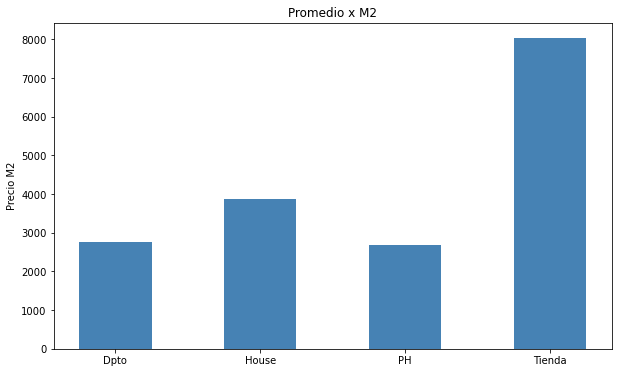

In [70]:
#PROMEDIO DE VALOR M2 X TIPO DE PROP
pricemeans=(pricecasa,pricedpto,priceph,pricestore)
width = 0.50 # ancho de las barras

fig = plt.figure(figsize=(10,6)); ax = plt.axes()

ax.bar(titulos, pricemeans, width, color='steelblue') # barra roja. 

ax.set_ylabel('Precio M2'); ax.set_title('Promedio x M2')
plt.show()

In [71]:
data_3_nodup['state_name'].unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa AtlÃ¡ntica', 'Entre RÃ\xados',
       'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'CÃ³rdoba',
       'Bs.As. G.B.A. Zona Oeste', 'Misiones', 'Buenos Aires Interior',
       'Salta', 'NeuquÃ©n', 'RÃ\xado Negro', 'San Luis', 'Mendoza',
       'Corrientes', 'Chubut', 'TucumÃ¡n', 'La Pampa', 'Chaco',
       'San Juan', 'Santa Cruz', 'Tierra Del Fuego', 'Catamarca',
       'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

In [72]:
maskcor=data_3_nodup['state_name']=="CÃ³rdoba"
meancor=data_3_nodup['price_usd_per_m2_clean'][maskcor].mean().round(2)
meancor

6964.78

In [73]:
masksantafe=data_3_nodup['state_name']=="Santa Fe"
meansantafe=data_3_nodup['price_usd_per_m2_clean'][masksantafe].mean().round(2)
meansantafe

6028.13

In [74]:
maskbuenosaires=data_3_nodup['state_name']=="Capital Federal"
meanbuenosaires=data_3_nodup['price_usd_per_m2_clean'][maskbuenosaires].mean().round(2)
meanbuenosaires

3752.57

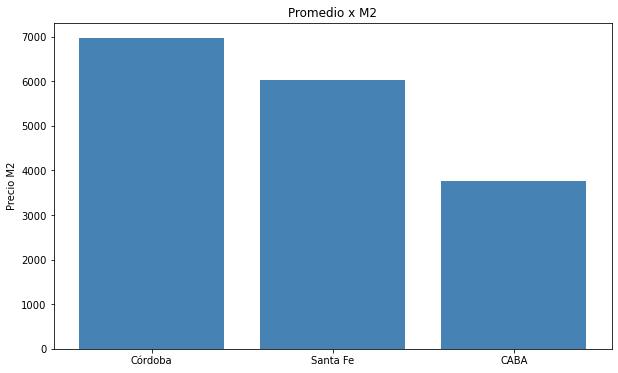

In [75]:
#Promedio M2 por top 3 provincias
provsmeans=(meancor,meansantafe,meanbuenosaires)
titulos2= ('Córdoba','Santa Fe', 'CABA')
width = 0.50 # ancho de las barras

fig = plt.figure(figsize=(10,6)); ax = plt.axes()

ax.bar(titulos2, provsmeans, color='steelblue') # barra roja. 

ax.set_ylabel('Precio M2'); ax.set_title('Promedio x M2')
plt.show()

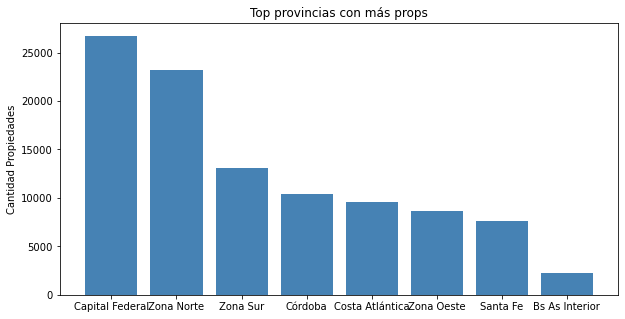

In [76]:
#Top ranking de provincias con más propiedades

ranking=data_3_nodup['state_name'].value_counts()
topranking=ranking.head(8)
titulos3=('Capital Federal', 'Zona Norte','Zona Sur', 'Córdoba','Costa Atlántica',
          'Zona Oeste','Santa Fe','Bs As Interior')

width = 0.50 # ancho de las barras

fig = plt.figure(figsize=(10,5)); ax = plt.axes()

ax.bar(titulos3, topranking, color='steelblue') # barra roja. 

ax.set_ylabel('Cantidad Propiedades'); ax.set_title('Top provincias con más props')
plt.show()

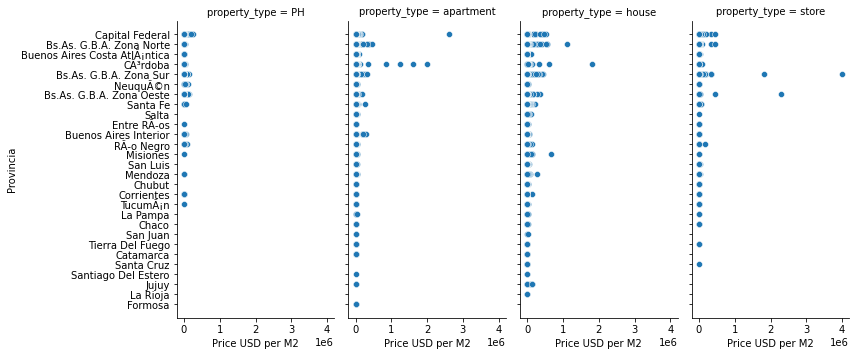

In [77]:
g = sns.FacetGrid(data_3_nodup, col="property_type")
g.map(sns.scatterplot,"price_usd_per_m2_clean","state_name")
g.fig.set_size_inches(12, 6)
g.set_axis_labels("Price USD per M2", "Provincia")
plt.show()


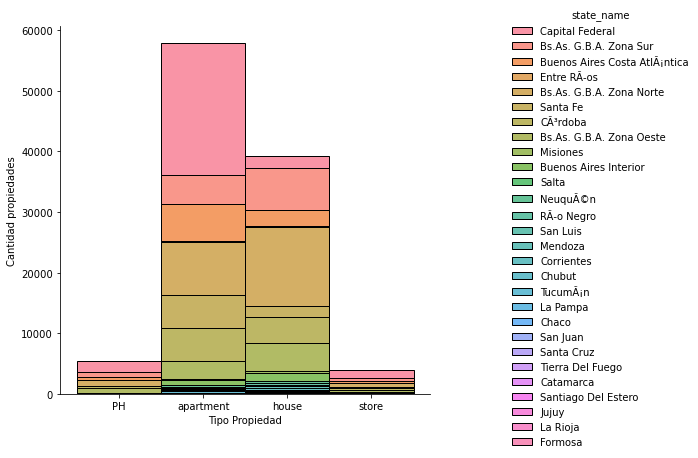

In [78]:
g = sns.displot(data=data_3_nodup, x="property_type", hue="state_name", multiple="stack")
g.fig.set_size_inches(10, 6)
g.set_axis_labels("Tipo Propiedad", "Cantidad propiedades")
plt.show()

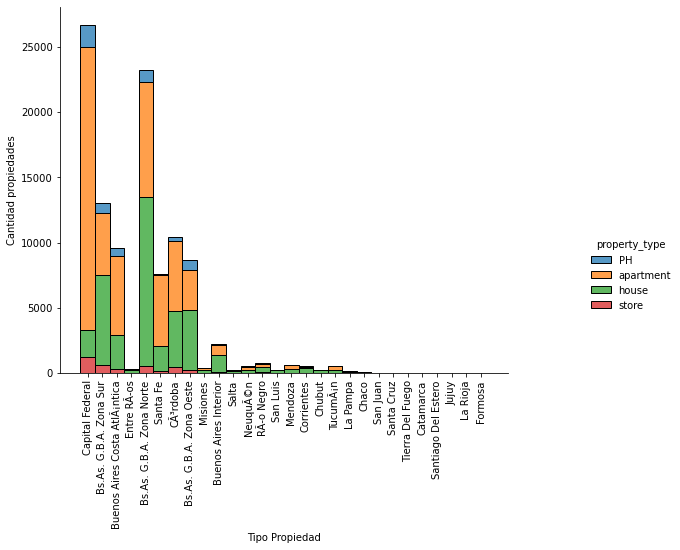

In [79]:
g = sns.displot(data=data_3_nodup, x="state_name", hue="property_type", multiple="stack")
g.fig.set_size_inches(10, 6)
g.set_axis_labels("Tipo Propiedad", "Cantidad propiedades")
plt.xticks(rotation=90)
plt.show()

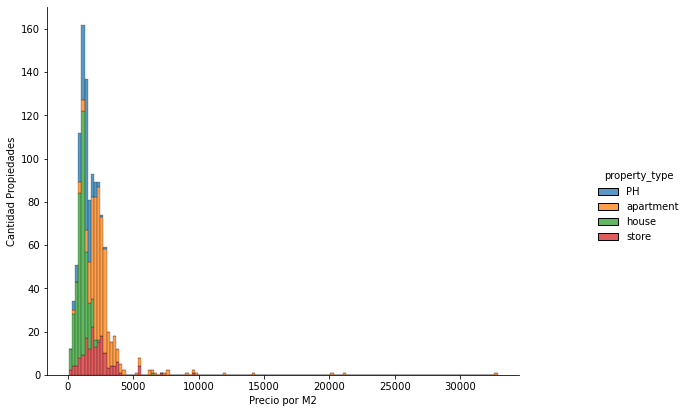

In [80]:
g = sns.displot(data=data_pivot, x="price_usd_per_m2", hue="property_type", multiple="stack")
g.fig.set_size_inches(10, 6)
g.set_axis_labels("Precio por M2", "Cantidad Propiedades")
plt.show()

In [81]:
data_cf=data_3_nodup.loc[data.state_name == 'Capital Federal', :]
data_cf=data_cf.loc[data.property_type != 'store', :]
data_cf.shape
data_cf.rename(columns={'place_name':'Barrio'}, inplace=True)
print(data_cf.columns)

Index(['operation', 'property_type', 'Barrio', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat', 'lon', 'price',
       'currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'description', 'title', 'price_usd_per_m2_clean', 'pileta',
       'cochera', 'ambientes', 'barrio_cerrado', 'geometry'],
      dtype='object')


In [82]:
contar_CF = data_cf['Barrio'].value_counts()
contar_CF.head(5)

Palermo          2334
Belgrano         2302
Caballito        1792
Recoleta         1289
Villa Urquiza    1177
Name: Barrio, dtype: int64

In [83]:
mask_contar = contar_CF>400
data_cf1 = contar_CF[mask_contar]
data_cf1

mask_barrio = (data_cf.Barrio == 'Belgrano')|(data_cf.Barrio == 'Palermo')|(data_cf.Barrio == 'Caballito')|(data_cf.Barrio == 'Villa Urquiza')|(data_cf.Barrio == 'Recoleta')|(data_cf.Barrio == 'Flores')|(data_cf.Barrio == 'Villa Crespo')|(data_cf.Barrio == 'San Telmo')|(data_cf.Barrio == 'Almagro')|(data_cf.Barrio == 'Barrio Norte')|(data_cf.Barrio == 'Boedo')|(data_cf.Barrio == 'Nuñez')|(data_cf.Barrio == 'Puerto Madero')|(data_cf.Barrio == 'Balvanera')|(data_cf.Barrio == 'San Cristobal')|(data_cf.Barrio == 'Saavedra')|(data_cf.Barrio == 'Palermo Hollywood')|(data_cf.Barrio == 'Floresta')|(data_cf.Barrio == 'Monserrat')|(data_cf.Barrio == 'Villa del Parque')|(data_cf.Barrio == 'Villa Luro')|(data_cf.Barrio == 'Barracas')|(data_cf.Barrio == 'Villa Devoto')

C:\Users\agalli\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


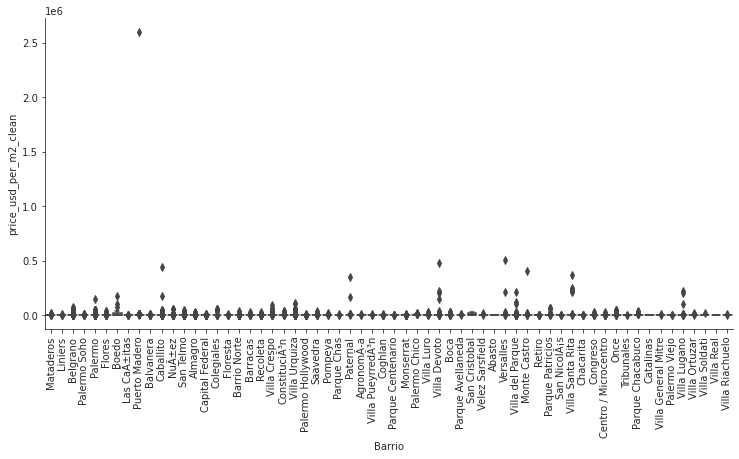

In [84]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("Barrio", "price_usd_per_m2_clean",data=data_cf, kind="box")
    g.fig.set_size_inches(12,5)
    g.set_axis_labels("Barrio", "price_usd_per_m2_clean");
    plt.xticks(rotation=90)

C:\Users\agalli\Anaconda3\envs\dhdsblend2021_geopandas\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


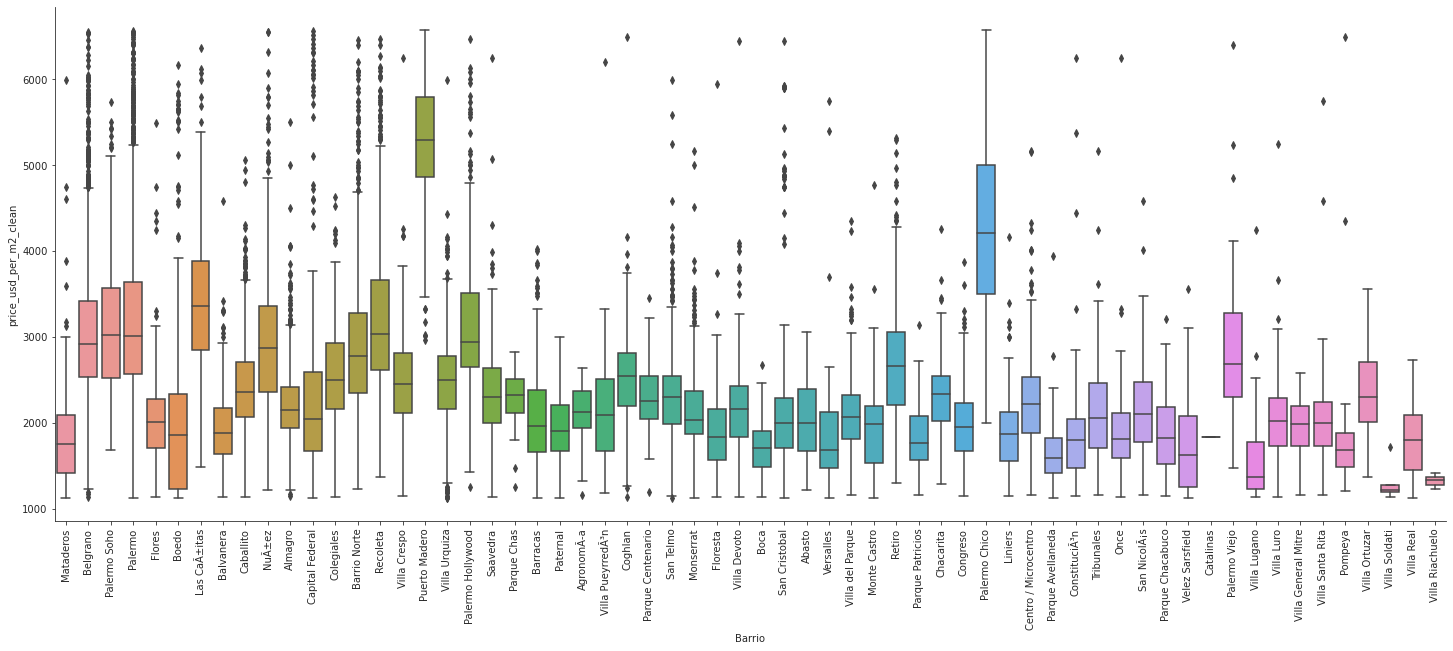

In [85]:
removed_outliers = data_cf['price_usd_per_m2_clean'].between(data_cf['price_usd_per_m2_clean'].quantile(.05), data_cf['price_usd_per_m2_clean'].quantile(.95))
data_cf=data_cf[removed_outliers]
data_cf.shape 
with sns.axes_style(style='ticks'):
    g = sns.catplot("Barrio", "price_usd_per_m2_clean",data=data_cf, kind="box")
    g.fig.set_size_inches(25,8)
    g.set_axis_labels("Barrio", "price_usd_per_m2_clean");
    plt.xticks(rotation=90)

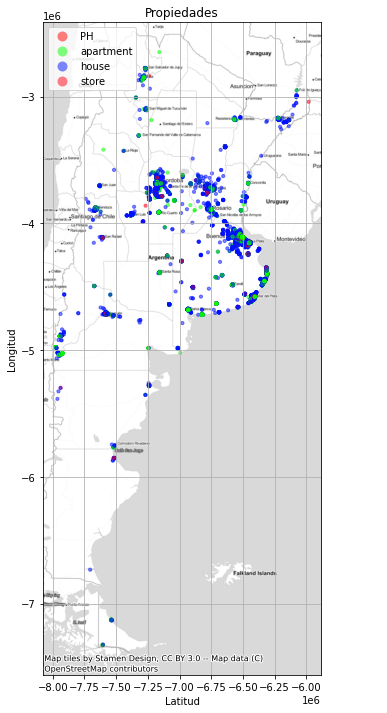

In [86]:
#GEOLOCALIZACIÓN SEGÚN TIPO DE PROPIEDAD

fig, ax = plt.subplots(figsize=(8,12))
ax.set_title('Propiedades')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')
plt.grid()

dptos.crs = "EPSG:4326"                        
geo_mask_3857 = dptos.to_crs(epsg=3857)       
geo_mask_3857.plot(column= 'property_type', cmap='hsv', ax=ax,legend = True,alpha=0.5, markersize=10)

cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

In [87]:
mask_caba=data_3_nodup['state_name']=='Capital Federal'
mask_caba1=data_3_nodup[mask_caba]

In [88]:
geodptos = gpd.points_from_xy(mask_caba1.lon, mask_caba1.lat)
dptos_caba = gpd.GeoDataFrame(mask_caba1, geometry=geodptos)

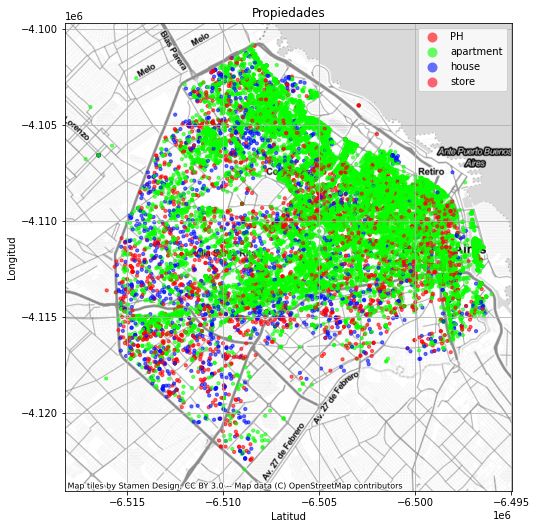

In [89]:
#GEOLOCALIZACIÓN POR TIPO DE PROPIEDAD EN CABA
fig, ax = plt.subplots(figsize=(8,12))
ax.set_title('Propiedades')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')
plt.grid()

dptos_caba.crs = "EPSG:4326"                        
dptos_caba_3857 = dptos_caba.to_crs(epsg=3857)       
dptos_caba_3857.plot(column= 'property_type', cmap='hsv', ax=ax,legend = True,alpha=0.6, markersize=10)

cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

In [90]:
(data_3_nodup.isnull().sum()/data_3_nodup.shape[0])*100

operation                   0.000000
property_type               0.000000
place_name                  0.021620
place_with_parent_names     0.000000
country_name                0.000000
state_name                  0.000000
geonames_id                15.953677
lat                        39.772332
lon                        39.772332
price                      15.246797
currency                   15.246797
price_aprox_usd            15.246797
surface_total_in_m2        34.446293
surface_covered_in_m2      16.675597
price_usd_per_m2           43.635731
price_per_m2               26.666855
floor                      93.574161
rooms                      59.235968
description                 0.001880
title                       0.000000
price_usd_per_m2_clean     22.253556
pileta                      0.000000
cochera                     0.000000
ambientes                  71.321546
barrio_cerrado             99.126740
geometry                    0.000000
dtype: float64

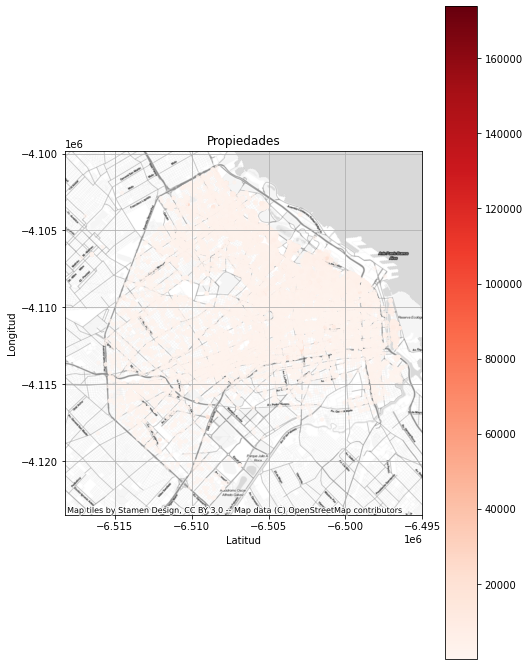

In [91]:
fig, ax = plt.subplots(figsize=(8,12))
ax.set_title('Propiedades')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')
plt.grid()

dptos_caba.crs = "EPSG:4326"                        
dptos_caba_3857 = dptos_caba.to_crs(epsg=3857)       
dptos_caba_3857.plot(column= 'price_usd_per_m2', cmap='Reds', ax=ax,legend = True,alpha=0.6, markersize=10)

cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite) 

In [92]:
data_3_nodup['price_usd_per_m2_clean'].describe()

count    8.270900e+04
mean     3.558569e+03
std      2.620410e+04
min      6.000000e-01
25%      1.222222e+03
50%      1.800000e+03
75%      2.521186e+03
max      4.000000e+06
Name: price_usd_per_m2_clean, dtype: float64

In [93]:
data_3_nodup['price_usd_per_m2_clean'].max()

3999999.96

In [104]:
preciomax=data_3_nodup['price_usd_per_m2_clean']<5000
data_3_nodup=data_3_nodup[preciomax]
data_3_nodup['price_usd_per_m2_clean'].describe()

count    61299.000000
mean      1453.594051
std        606.607887
min          0.600000
25%       1035.446941
50%       1506.666667
75%       1935.032468
max       2499.990000
Name: price_usd_per_m2_clean, dtype: float64

In [105]:
mask_caba=data_3_nodup['state_name']=='Capital Federal'
mask_caba1=data_3_nodup[mask_caba]

In [106]:
geodptos = gpd.points_from_xy(mask_caba1.lon, mask_caba1.lat)
dptos_caba = gpd.GeoDataFrame(mask_caba1, geometry=geodptos)

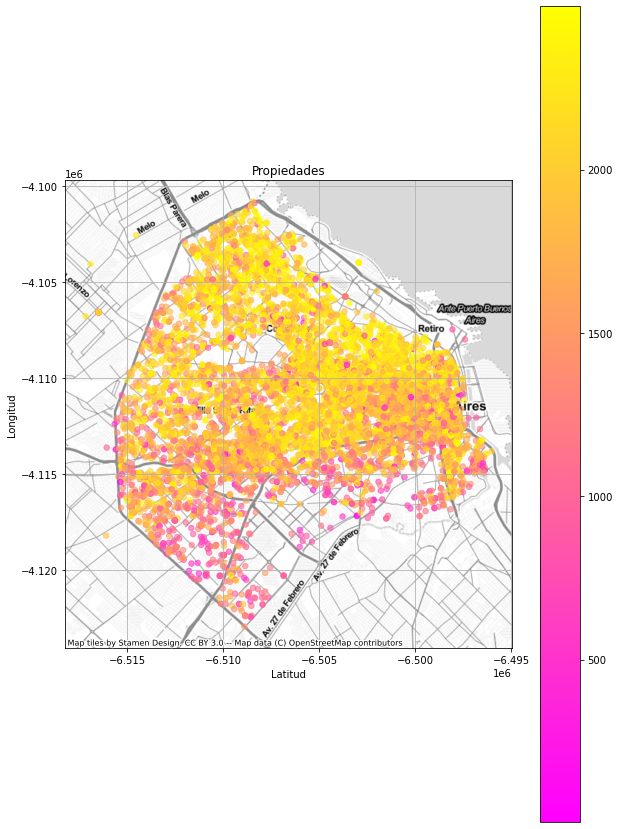

In [109]:
fig, ax = plt.subplots(figsize=(10,15))
ax.set_title('Propiedades')
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')
plt.grid()

dptos_caba.crs = "EPSG:4326"                        
dptos_caba_3857 = dptos_caba.to_crs(epsg=3857)       
dptos_caba_3857.plot(column= 'price_usd_per_m2_clean', cmap='spring', ax=ax,legend = True,alpha=0.6, markersize=30)

cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite) 